In [1]:
%cd
import uproot4 as uproot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import mplhep as hep
import pandas as pd
import awkward as ak
import logging
plt.style.use(hep.style.ATLAS)  # or ATLAS/LHCb

/home/rdhill13


In [2]:
efile = uproot.open("/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/reco/SINGLE/e-/5GeV/130to177deg/e-_5GeV_130to177deg.0020.root")
etree = efile['events;1']
pifile = uproot.open("/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/reco/SINGLE/pi+/5GeV/45to135deg/pi+_5GeV_45to135deg.0020.root")
pitree = pifile['events;1']

for i in range(len(pitree)):
    print(pitree[i])

<TBranchElement 'EcalEndcapNClusters' (21 subbranches) at 0x2b1e2d620af0>
<TBranchElement 'EcalEndcapNClusters#0' (2 subbranches) at 0x2b1e30a20ca0>
<TBranchElement 'EcalEndcapNClusters#1' (2 subbranches) at 0x2b1e30a2c940>
<TBranchElement 'EcalEndcapPClusters' (21 subbranches) at 0x2b1e30a385e0>
<TBranchElement 'EcalEndcapPClusters#0' (2 subbranches) at 0x2b1e30a86760>
<TBranchElement 'EcalEndcapPClusters#1' (2 subbranches) at 0x2b1e30a93400>
<TBranchElement 'EcalBarrelClusters' (19 subbranches) at 0x2b1e30aa00a0>
<TBranchElement 'EcalBarrelClusters#0' (2 subbranches) at 0x2b1e30ae1ee0>
<TBranchElement 'EcalBarrelClusters#1' (2 subbranches) at 0x2b1e30aedb80>
<TBranchElement 'EcalBarrelLayers' (15 subbranches) at 0x2b1e30afa820>
<TBranchElement 'EcalBarrelLayers#0' (2 subbranches) at 0x2b1e30b370a0>
<TBranchElement 'HcalBarrelClusters' (21 subbranches) at 0x2b1e30b3cd00>
<TBranchElement 'HcalBarrelClusters#0' (2 subbranches) at 0x2b1e30b8be80>
<TBranchElement 'HcalBarrelClusters#1' (2

In [3]:
e_hcal = etree['HcalBarrelClusters']
e_ecal = etree['EcalBarrelClusters']

pi_hcal = pitree['HcalBarrelClusters']
pi_ecal = pitree['EcalBarrelClusters']

In [4]:
e_file = uproot.open("/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/full/SINGLE/e-/5GeV/130to177deg/e-_5GeV_130to177deg.0020.root")
e_tree = e_file['events']
e_events = e_tree['mcparticles']

pi_file = uproot.open("/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/full/SINGLE/pi+/5GeV/45to135deg/pi+_5GeV_45to135deg.0020.root")
pi_tree = pi_file['events']
pi_events = pi_tree['mcparticles']

In [5]:
def get_truthHCAL(data):
    barrelE = data['HcalBarrelClusters.energy'].array(library='np')
    barrel_polTheta = data['HcalBarrelClusters.polar.theta'].array(library='np')
    barrel_polPhi = data['HcalBarrelClusters.polar.phi'].array(library='np')
    #hEndcapE = data['HcalHadronEndcapClusters.energy'].array(library='np')
    #hEndcapT = data['HcalHadronEndcapClusters.polar.theta'].array(library='np')
    #hEndcapP = data['HcalHadronEndcapClusters.polar.phi'].array(library='np')
    #eEndcapE = data['HcalElectronEndcapClusters.energy'].array(library='np')
    #eEndcapT = data['HcalElectronEndcapClusters.polar.theta'].array(library='np')
    #eEndcapP = data['HcalElectronEndcapClusters.polar.phi'].array(library='np')
    return barrelE, barrel_polTheta, barrel_polPhi#, hEndcapE, hEndcapT, hEndcapP, eEndcapE, eEndcapT, eEndcapP


def get_truthECAL(data):
    barrelE = data['EcalBarrelClusters.energy'].array(library='np')
    barrel_polTheta = data['EcalBarrelClusters.polar.theta'].array(library='np')
    barrel_polPhi = data['EcalBarrelClusters.polar.phi'].array(library='np')
    #hEndcapE = data['EcalEndcapP.Clustersenergy'].array(library='np')
    #hEndcapT = data['EcalEndcapPClusters.polar.theta'].array(library='np')
    #hEndcapP = data['EcalEndcapPClusters.polar.phi'].array(library='np')
    #eEndcapE = data['EcalEndcapNClusters.energy'].array(library='np')
    #eEndcapT = data['EcalEndcapNClusters.polar.theta'].array(library='np')
    #eEndcapP = data['EcalEndcapNClusters.polar.phi'].array(library='np')
    return barrelE, barrel_polTheta, barrel_polPhi#, hEndcapE, hEndcapT, hEndcapP, eEndcapE, eEndcapT, eEndcapP


def get_truth2(gen_events):
    g4parent = gen_events['mcparticles.g4Parent'].array(library='np')
    pdgID = gen_events['mcparticles.pdgID'].array(library='np')
    status = gen_events['mcparticles.status'].array(library='np')
    genStatus = gen_events['mcparticles.genStatus'].array(library='np')
    pex = gen_events['mcparticles.psx'].array(library='np')
    pey = gen_events['mcparticles.psy'].array(library='np')
    pez = gen_events['mcparticles.psz'].array(library='np')
    mass = gen_events['mcparticles.mass'].array(library='np')
    return pdgID, status, genStatus, pex, pey, pez, mass, g4parent


def truth_df(hcal, ecal, gen_events):
    hcalTruth = {}
    hcalTruth['HcalBarrelClusters.energy'], hcalTruth['HcalBarrelClusters.polar.theta'], hcalTruth['HcalBarrelClusters.polar.phi'] = get_truthHCAL(hcal) 
    hcal_df = pd.DataFrame(hcalTruth)
    ecalTruth = {}
    ecalTruth['EcalBarrelClusters.energy'], ecalTruth['EcalBarrelClusters.polar.theta'], ecalTruth['EcalBarrelClusters.polar.phi'] = get_truthECAL(ecal) 
    ecal_df = pd.DataFrame(ecalTruth)
    barrels = hcal_df.join(ecal_df)
    mc = {}
    mc['mcparticles.pdgID'], mc['mcparticles.status'], mc['mcparticles.genStatus'], mc['mcparticles.psx'], mc['mcparticles.psy'], mc['mcparticles.psz'], mc['mcparticles.mass'], mc['mcparticles.g4Parent'] = get_truth2(gen_events)
    mcparticles = pd.DataFrame(mc)
    final_df = mcparticles.join(barrels)
    final_df.keys()
    return final_df

In [6]:
e_df = truth_df(e_hcal, e_ecal, e_events)

In [7]:
class HistManager:
    def __init__(self):
        self.histograms = {}
    

    def clear(self):
        self.histograms = {}

    def add(self, df, name, x, cuts=[], nbins=100, range=[0,1], density=False):
        
        
        #branch = df[varString].ravel()
    
        mask = np.ones(len(x), dtype=bool)

        for cut in cuts:
            if len(mask) != len(cut):
                print("Error: existing bitmask and new cut bitmask have different sizes!")

            mask = np.bitwise_and(np.array(mask), np.array(cut))
        
        if name not in self.histograms:
            print(f"Creating histogram named {name} ... ")
            self.histograms[name] = np.histogram(x[mask], nbins, range, density=density)
        else:
            (hist, bins) = np.histogram(x[mask], nbins, range)
            newhist = np.sum([hist, self.histograms[name][0]], axis=0)
            self.histograms[name] = (newhist, self.histograms[name][1])
    
    def get_all(self):
        return self.histograms

    def get(self, name):
        return self.histograms[name]

    def get_hist(self, name):
        return self.histograms[name][0]
    
    def get_bins(self, name):
        return self.histograms[name][1]

def HCALEnergy(row, eta_range=[-3.5,-1]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return -1.0
    
    dRmax = 1.0
    TotalHCAL = 0.0

    for system in ["HcalBarrel", "HcalHadronEndcap", "HcalElectronEndcap"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalHCAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass

        
    return TotalHCAL


def ECALEnergy(row, eta_range=[-3.5,-1]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return -1.0
        
    dRmax = 1.0
    TotalECAL = 0.0
    
    for system in ["EcalBarrel", "EcalEndcapP", "EcalEndcapN"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalECAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass
        
    return TotalECAL


def PrimaryTrackTheta(row):
    mc_ID = row["mcparticles.pdgID"]
    mc_status = row["mcparticles.genStatus"]
    mc_g4 = row["mcparticles.g4Parent"]
    mc_vx = row["mcparticles.psx"]
    mc_vy = row["mcparticles.psy"]
    mc_vz = row["mcparticles.psz"]
    
    isThrown = mc_status # == 1  # mc_g4 == 0
    thrown_ID = mc_ID[isThrown]
    theta = np.arctan2(np.sqrt(mc_vx[isThrown]**2 + mc_vy[isThrown]**2), mc_vz[isThrown])
    phi = np.arctan2(mc_vy[isThrown],mc_vx[isThrown])
    
    return theta[0]

def PrimaryTrackPhi(row):
    mc_ID = row["mcparticles.pdgID"]
    mc_status = row["mcparticles.genStatus"]
    mc_vx = row["mcparticles.psx"]
    mc_vy = row["mcparticles.psy"]
    mc_vz = row["mcparticles.psz"]
    
    isThrown = mc_status# == 1
    thrown_ID = mc_ID[isThrown]
    theta = np.arctan2(np.sqrt(mc_vx[isThrown]**2 + mc_vy[isThrown]**2), mc_vz[isThrown])
    phi = np.arctan2(mc_vy[isThrown],mc_vx[isThrown])
    
    return phi[0]

def PrimaryTrackID(row):
    mc_ID = row["mcparticles.pdgID"]
    mc_status = row["mcparticles.genStatus"]
    
    isThrown = mc_status#  == 1
    thrown_ID = mc_ID[isThrown]
    
    return thrown_ID[0]

def GoodClusters(energy = np.array([]), theta = np.array([]), phi = np.array([])):
    
    return (energy != 0) & (theta != 0) & (phi != 0)
    

def ElectronID(row):
    # Find the highest-energy cluster and the energy in a region around it
    
    MaxCluster_E = 0.0
    MaxCluster_Phi = -999
    MaxCluster_Theta = -999
    IsolationEnergy = -999
    
    # Barrrel energies
    for system in ["EcalBarrel", "EcalEndcap", "CrystalEcal"]:
        cl_energy = row[f"{system}Clusters.energy"]
        cl_theta  = row[f"{system}Clusters.polar.theta"]
        cl_phi    = row[f"{system}Clusters.polar.phi"]

        if len(cl_energy) == 0:
            continue

        good = GoodClusters(cl_energy, cl_theta, cl_phi)

        if len(cl_energy[good]) == 0:
            continue

        NewMaxCluster_E = np.max(cl_energy[good])
        if NewMaxCluster_E > MaxCluster_E:
            MaxCluster_E = NewMaxCluster_E
            index = np.where(cl_energy == MaxCluster_E)
            MaxCluster_Phi = cl_phi[index][0]
            MaxCluster_Theta = cl_theta[index][0]
    
    if MaxCluster_E > 0.0:

        # Compute the isolation energy
        IsolationEnergy = 0.0
        for system in ["EcalBarrel", "EcalEndcap", "CrystalEcal"]:
            if len(row[f"{system}Clusters.energy"]) == 0:
                continue

            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]

            good = GoodClusters(cl_energy, cl_theta, cl_phi)
            
            if len(cl_energy[good]) == 0:
                continue
            
            for index, cluster_energy in enumerate(cl_energy[good]):
                if cluster_energy == 0.0:
                    continue

                cl_eta = -np.log(np.tan(cl_theta[good][index]/2))
                max_cl_eta = -np.log(np.tan(MaxCluster_Theta/2))
                
                DeltaR = np.sqrt((cl_phi[good][index] - MaxCluster_Phi)**2 + (cl_eta - max_cl_eta)**2)
                if DeltaR < 1.0 and DeltaR > 0.1:
                    IsolationEnergy += cluster_energy

    return pd.Series((MaxCluster_Theta, MaxCluster_Phi, IsolationEnergy))



def ProcessFiles(files={}, branches=[], hist_manager=None, name="", eta_range=[-1,1], output_arrays = None):
    count = 0
    for batch in uproot.iterate([files], 
                            branches, 
                            step_size = '1000 MB',
                            library="np"):

        df = pd.DataFrame(batch)
        #df["PrimaryID"]     = df.apply(PrimaryTrackID, axis=1)
        #df["PrimaryTheta"]  = df.apply(PrimaryTrackTheta, axis=1)
        #df["PrimaryPhi"]    = df.apply(PrimaryTrackPhi,  axis=1)
        #df["ECALEnergyFraction"] = df.apply(ECALEnergyFraction, axis=1)
        df["ECALEnergy"] = df.apply(ECALEnergy, eta_range=eta_range, axis=1)  # apply function ECALEnergy to each row. 
        df["HCALEnergy"] = df.apply(HCALEnergy, eta_range=eta_range, axis=1)
        df["ECALEnergyFraction"] = df["ECALEnergy"]/(df["ECALEnergy"] + df["HCALEnergy"])
        
        #df[["ElectronTheta", "ElectronPhi", "ElectronIsoE"]] = df.apply(ElectronID, axis=1)
    
        hist_manager.add(df, f"{name}ECALEnergyFraction", x=df["ECALEnergyFraction"], cuts=[(df["ECALEnergy"] + df["HCALEnergy"]) > 0], nbins=100, range=[0,1.0], density=True)
        hist_manager.add(df, f"{name}ECALEnergy", x=df["ECALEnergy"]/1000.0, cuts=[], nbins=100, range=[0,10.0], density=True)
        hist_manager.add(df, f"{name}HCALEnergy", x=df["HCALEnergy"]/1000.0, cuts=[], nbins=100, range=[0,10.0], density=True)
        count += 1
        
        if output_arrays is not None:
            for key in output_arrays:
                output_arrays[key] = np.concatenate([output_arrays[key], df[key]])
                
                
def ProcessFiles2(dataframe, hist_manager=None, name="", eta_range=[-3.5,-1], output_arrays = None):
    df = dataframe
    df["PrimaryID"]     = df.apply(PrimaryTrackID, axis=1)
    df["PrimaryTheta"]  = df.apply(PrimaryTrackTheta, axis=1)
    df["PrimaryPhi"]    = df.apply(PrimaryTrackPhi,  axis=1)
    df["ECALEnergy"] = df.apply(ECALEnergy, eta_range=eta_range, axis=1)  # apply function ECALEnergy to each row. 
    df["HCALEnergy"] = df.apply(HCALEnergy, eta_range=eta_range, axis=1)
    df["ECALEnergyFraction"] = df["ECALEnergy"]/(df["ECALEnergy"] + df["HCALEnergy"])
        
    #df[["ElectronTheta", "ElectronPhi", "ElectronIsoE"]] = df.apply(ElectronID, axis=1)
    
    hist_manager.add(df, f"{name}ECALEnergyFraction", x=df["ECALEnergyFraction"], cuts=[(df["ECALEnergy"] + df["HCALEnergy"]) > 0], nbins=100, range=[0,1.0], density=True)
    hist_manager.add(df, f"{name}ECALEnergy", x=df["ECALEnergy"]/1000.0, cuts=[], nbins=100, range=[0,10.0], density=False)
    hist_manager.add(df, f"{name}HCALEnergy", x=df["HCALEnergy"]/1000.0, cuts=[], nbins=100, range=[0,10.0], density=False)
        
    if output_arrays is not None:
        for key in output_arrays:
            output_arrays[key] = np.concatenate([output_arrays[key], df[key]])

In [8]:
def process(df, name, eta_range=[-1,1]):
    hm = HistManager()
    hm.clear()

    data_arrays = {}
    data_arrays["ECALEnergyFraction"] = np.array([])
    data_arrays["ECALEnergy"] = np.array([])
    data_arrays["HCALEnergy"] = np.array([])

    bak_data_arrays = data_arrays.copy()
    fwd_data_arrays = data_arrays.copy()
    ProcessFiles2(df, hm, name, eta_range=eta_range, output_arrays=data_arrays)
    
    hep.histplot(hm.get_hist(f"{name}ECALEnergy"), hm.get_bins(f"{name}ECALEnergy"), label=f"{name}ECALEnergy", alpha=1.0, color='c', fill=False, lw=3)
    hep.histplot(hm.get_hist(f"{name}HCALEnergy"), hm.get_bins(f"{name}HCALEnergy"), label=f"{name}HCALEnergy", alpha=1.0, color='k', fill=False, lw=3)
    plt.title(r"$\bf{ATHENA}$" +' simulation [DD4hep] \nPythia8+Geant4',fontsize=22)
    plt.xlabel("$f_{EM} \equiv E_{EM}/E_{CALO}$")
    plt.ylabel("Density")
    plt.legend()
    plt.ylim([1e-3,1e7])
    plt.yscale("log")
    # plt.xscale("log")
    plt.text(0.05,1e6,"${}<\eta<{}$".format(eta_range[0], eta_range[1]))
    plt.tight_layout()
    #plt.savefig("EMFraction_e_vs_pi-G4.png", dpi=200)
    plt.show()
    return data_arrays

Creating histogram named eECALEnergyFraction ... 
Creating histogram named eECALEnergy ... 
Creating histogram named eHCALEnergy ... 


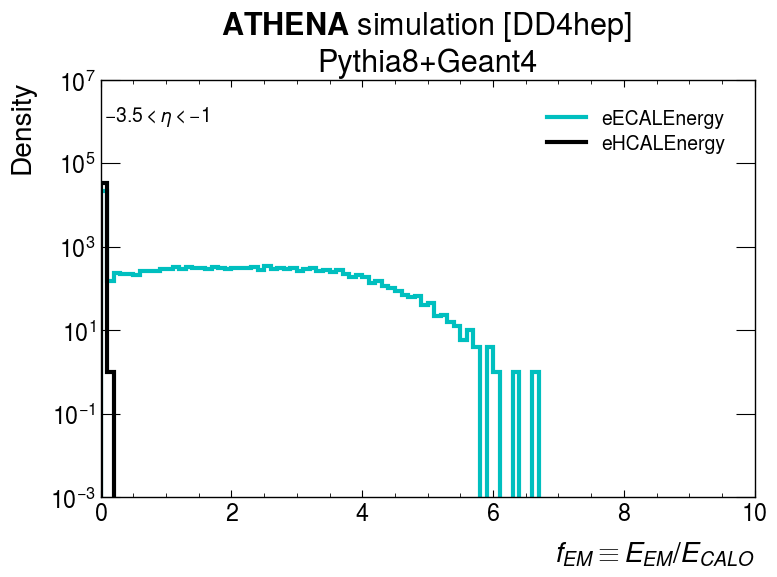

{'ECALEnergyFraction': array([nan, nan, nan, ..., 0.5, 0.5, 0.5]),
 'ECALEnergy': array([ 0.,  0.,  0., ..., -1., -1., -1.]),
 'HCALEnergy': array([ 0.,  0.,  0., ..., -1., -1., -1.])}

In [9]:
e_data = process(e_df, "e", eta_range=[-3.5,-1])
e_data

In [10]:
df = pd.DataFrame(e_data, columns = e_data.keys())
df = df[df["ECALEnergy"] + df["HCALEnergy"] > 0.0]
print(df.head())

    ECALEnergyFraction   ECALEnergy  HCALEnergy
7                  1.0  3138.377947         0.0
9                  1.0  2768.709580         0.0
10                 1.0  1761.740140         0.0
33                 1.0  3065.218738         0.0
35                 1.0  3703.321935         0.0


Creating histogram named pi+ECALEnergyFraction ... 
Creating histogram named pi+ECALEnergy ... 
Creating histogram named pi+HCALEnergy ... 


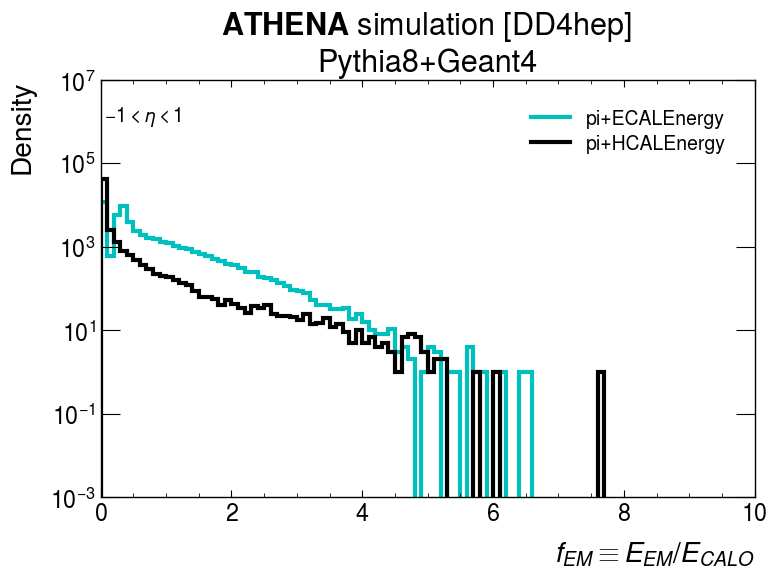

{'ECALEnergyFraction': array([       nan, 1.        , 0.77890093, ..., 1.        , 0.96978007,
        0.99735644]),
 'ECALEnergy': array([   0.        ,  497.12304983,  395.94483159, ...,  277.94967605,
         425.23617471, 1484.64790644]),
 'HCALEnergy': array([  0.        ,   0.        , 112.39302826, ...,   0.        ,
         13.25105381,   3.93516135])}

In [11]:
pi_df = truth_df(pi_hcal, pi_ecal, pi_events)
pi_data = process(pi_df, "pi+", eta_range=[-1,1])
pi_data

In [12]:
df = pd.DataFrame(pi_data, columns = pi_data.keys())
df = df[df["ECALEnergy"] + df["HCALEnergy"] > 0.0]
print(df.head())

   ECALEnergyFraction  ECALEnergy  HCALEnergy
1            1.000000  497.123050    0.000000
2            0.778901  395.944832  112.393028
3            1.000000  187.973530    0.000000
4            0.808308  307.655911   72.961105
5            0.979960  382.889578    7.830168
